<a href="https://colab.research.google.com/github/pp2098/Zomato-Stock-Price-Prediction/blob/main/Zomato_Stock_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: To predict the Zomato Stock Price for next 7 days

In [89]:
#Loading of important libraries to predict the zomato stock price for next 7 days
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [90]:
#Loading of dataset
zoma=pd.read_csv('ZOMATO.csv',index_col='Date',parse_dates=True)
#Dataset is taken from the finance.yahoo.com of last one year and setting date is a index of the dataset

In [91]:
zoma.shape
#The dataset have 250 rows and 6 columns present in it.

(250, 6)

In [92]:
zoma.head()
#Loading top 5 rows of Zomato stock price dataset. In this Date is mentioned as index while Open column tells about at how much price 
#stock is going to open,High and low tells about the highest and lowest value it reaches respectively while Close and Adj Close tells about
#Closing price of a stock for a day and volume tells about the amount of selling and buying for a day.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-30,142.600006,142.699997,131.000000,133.500000,133.500000,88312522
2021-08-02,135.750000,140.750000,135.149994,139.699997,139.699997,66909732
2021-08-03,137.000000,140.800003,137.000000,139.399994,139.399994,46610001
2021-08-04,139.800003,141.000000,135.250000,138.399994,138.399994,41134419
2021-08-05,138.750000,138.899994,132.000000,134.949997,134.949997,38437134


In [93]:
#extracting of information about features
zoma.info()
#There are no null values present in the datset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2021-07-30 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [94]:
print(f'DataFrame of Zomato contains stock prices between {zoma.index.min()} {zoma.index.max()}')
print(f'Total Days = {(zoma.index.max() - zoma.index.min()).days} days')
#Tells about the range of zomato stock price data

DataFrame of Zomato contains stock prices between 2021-07-30 00:00:00 2022-07-29 00:00:00
Total Days = 364 days


In [95]:
zoma.describe()
#Statistical description about zomato stock price

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,104.535200,106.649600,101.543200,103.793200,103.793200,4.184886e+07
std,34.874671,35.366796,34.066024,34.751238,34.751238,5.288987e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,4.101820e+06
25%,74.475001,75.537498,71.249998,72.575001,72.575001,1.489808e+07
50%,96.474998,98.250000,93.474998,94.500000,94.500000,2.645513e+07
75%,137.162498,139.099995,133.300003,136.600006,136.600006,4.313539e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,4.123047e+08


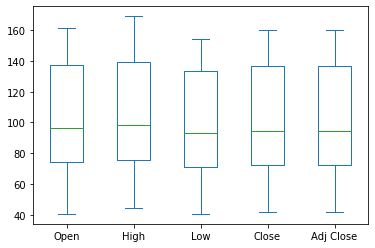

In [96]:
zoma[['Open','High','Low','Close','Adj Close']].plot(kind='box')
plt.show()
#Boxplot for detecting the outliers and as observed no outliers are present.

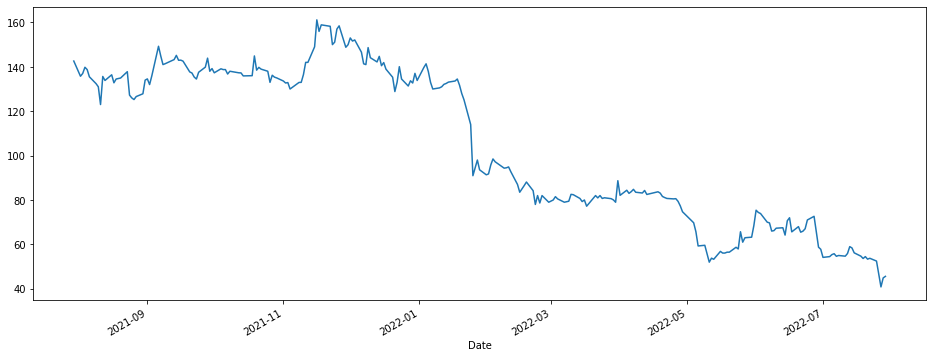

In [97]:
zoma['Open'].plot(figsize=(16,6))
#showing trend of opening stock of Zomato
#Observed from past many months is decreasing.

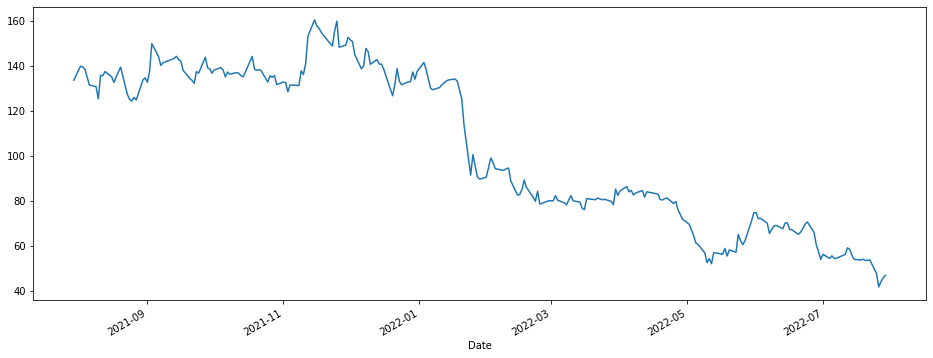

In [98]:
zoma['Adj Close'].plot(figsize=(16,6))
#Trend of Closing Price
#Closing Price is also decreasing

Text(0.5, 1.0, 'Opening Price of Zomato')

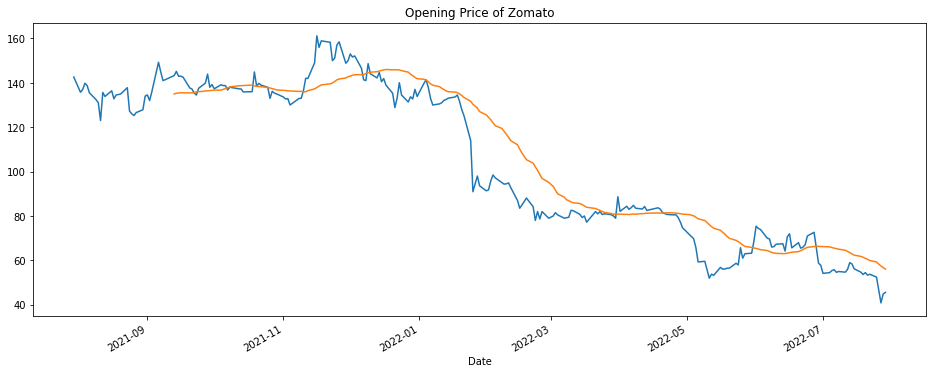

In [99]:
zoma['Open'].plot(figsize=(16,6))
zoma.rolling(window=30).mean()['Close'].plot()
plt.title("Opening Price of Zomato")
#uisng rolling functions we want to check the trend of opening price of Zomato and it is about to fit in trend.

Text(0.5, 1.0, 'Closing Price')

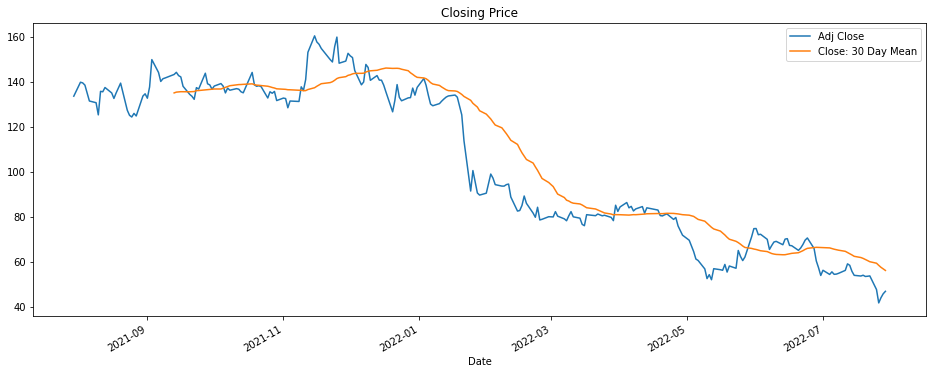

In [100]:
zoma['Close: 30 Day Mean']=zoma['Adj Close'].rolling(window=30).mean()
zoma[['Adj Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.title("Closing Price")
#Same Comment of Adj Clsing price also as opening price

In [101]:
zoma.index
#Checking the index

DatetimeIndex(['2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10',
               '2021-08-11', '2021-08-12',
               ...
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [102]:
zoma=zoma[['Adj Close']]
print(zoma.head())
#For prediction we only needs Adj Closing value so we kept only this and drop rest all the columns

             Adj Close
Date                  
2021-07-30  133.500000
2021-08-02  139.699997
2021-08-03  139.399994
2021-08-04  138.399994
2021-08-05  134.949997


In [103]:
forecast_out=7
zoma['Prediction']=zoma[['Adj Close']].shift(-forecast_out)
print(zoma.tail())
#As we want to predict the price for next 7 days.so i add a new coumn of forecast_out which contains value for how many day price we
#want to predict.It is just 7 row down the current adj column.so i create a new column called Prediction and populate it with data from Adj. close 
#column but shifted 7rows up to get price for next 7 days and print last 5 rows.

            Adj Close  Prediction
Date                             
2022-07-25  47.599998         NaN
2022-07-26  41.650002         NaN
2022-07-27  43.950001         NaN
2022-07-28  45.700001         NaN
2022-07-29  46.799999         NaN


In [104]:
X=np.array(zoma.drop(['Prediction'],axis=1))
X=X[:-forecast_out]
print(X)
#It is independent dataset which is used to train a model and i convert it to numpy array after dropping prediction column,then store this
#new data into X.Then i remove last 7 rows of data from X and store new data back to X.

[[133.5     ]
 [139.699997]
 [139.399994]
 [138.399994]
 [134.949997]
 [131.350006]
 [130.600006]
 [125.199997]
 [135.649994]
 [135.449997]
 [137.350006]
 [134.949997]
 [132.5     ]
 [134.949997]
 [139.300003]
 [127.25    ]
 [125.      ]
 [124.25    ]
 [125.849998]
 [124.699997]
 [133.550003]
 [134.550003]
 [132.600006]
 [137.600006]
 [149.75    ]
 [144.050003]
 [140.050003]
 [141.25    ]
 [141.600006]
 [143.149994]
 [144.100006]
 [142.649994]
 [142.050003]
 [137.899994]
 [134.300003]
 [133.449997]
 [132.100006]
 [137.300003]
 [136.649994]
 [143.699997]
 [139.      ]
 [138.5     ]
 [136.600006]
 [138.      ]
 [139.100006]
 [137.949997]
 [134.949997]
 [137.100006]
 [136.149994]
 [136.850006]
 [136.600006]
 [135.449997]
 [135.      ]
 [144.050003]
 [138.550003]
 [137.899994]
 [138.149994]
 [137.75    ]
 [132.699997]
 [135.449997]
 [134.800003]
 [135.600006]
 [131.550003]
 [132.649994]
 [132.449997]
 [128.350006]
 [131.350006]
 [131.149994]
 [137.649994]
 [136.050003]
 [140.899994]
 [153.

In [105]:
Y=np.array(zoma['Prediction'])
Y=Y[:-forecast_out]
print(Y)
#It is dependent numpy arrray named Y,i.e., target one.it contains prediction column and removes last 7 rows of data from Y to make sure
#there are no null value present.

[125.199997 135.649994 135.449997 137.350006 134.949997 132.5
 134.949997 139.300003 127.25     125.       124.25     125.849998
 124.699997 133.550003 134.550003 132.600006 137.600006 149.75
 144.050003 140.050003 141.25     141.600006 143.149994 144.100006
 142.649994 142.050003 137.899994 134.300003 133.449997 132.100006
 137.300003 136.649994 143.699997 139.       138.5      136.600006
 138.       139.100006 137.949997 134.949997 137.100006 136.149994
 136.850006 136.600006 135.449997 135.       144.050003 138.550003
 137.899994 138.149994 137.75     132.699997 135.449997 134.800003
 135.600006 131.550003 132.649994 132.449997 128.350006 131.350006
 131.149994 137.649994 136.050003 140.899994 153.       160.300003
 157.600006 156.550003 154.699997 149.75     148.699997 155.5
 159.75     148.149994 149.100006 152.550003 151.399994 150.649994
 144.899994 138.550003 139.800003 147.600006 146.25     140.550003
 142.649994 140.649994 140.600006 138.399994 135.350006 126.550003
 131.6000

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=101)
#Splitting the dataset into training and testing part.

In [107]:
from sklearn.svm import SVR
svc=SVR(kernel='rbf',C=100,gamma=0.1)
svc.fit(X_train,Y_train)
print("SVM Confidence: ",svc.score(X_test,Y_test))
#Using Support vector machine model and calculated its accuracy as 88%.

SVM Confidence:  0.883191997909545


In [108]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
print("Linear Regression Confidence: ",lr.score(X_test,Y_test))
#Using Linear Regression model and found the accuracy as 90%.

Linear Regression Confidence:  0.8960371486983083


In [110]:
x_forecast=np.array(zoma.drop(['Prediction'],axis=1))[-forecast_out:]
print(x_forecast)
x_forecast.shape
#now for forecasting i will take last 7 rows of data of adj close and store it to x_forecast variable.

[[53.5     ]
 [53.650002]
 [47.599998]
 [41.650002]
 [43.950001]
 [45.700001]
 [46.799999]]


(7, 1)

In [112]:
lr_prediction=lr.predict(x_forecast)
print(lr_prediction)
#Predicted Price by Linear Regression model as its accuracy is more for stock price of zomato for next 7  days.

[51.55008727 51.69839498 45.71672653 39.83393649 42.10795671 43.83819024
 44.92576362]
